In [1]:
import numpy as np

### MSE function:

In [2]:
def mse(y, y_hat):
    return ( 1 / y.size ) * sum((y - y_hat)**2)

## Create Data:

#### Create 1D arrays:

In [3]:
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5])
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2])

#### Create 2D arrays from 1D arrays:

In [4]:
#########################################################
# Equivalent ways of converting a 1D array into a 2D array:
#########################################################
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

In [5]:
nbr_thetas = 200

In [6]:
theta_0 = np.linspace(start=-1, stop=3, num=nbr_thetas)
theta_1 = np.linspace(start=-1, stop=3, num=nbr_thetas)

## Partial Derivative of MSE for $\theta_0$:
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^ {(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## Partial Derivative of MSE for $\theta_1$:
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^ {(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent function:

**Inputs:**
1. x values
2. y values
3. array of theta parameters (theta_0 at index 0 and theta_1 at index 1)

In [7]:
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(  y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum( (y - thetas[0] - thetas[1] * x) * x )
    
    ###########################################
    # Equivalent ways of combining two arrarys:
    ###########################################
    #return np.array( [ theta0_slope[0], theta1_slope[0] ] )
    #return np.append( arr=theta0_slope, values=theta1_slope 
    return np.concatenate( (theta0_slope, theta1_slope) )
    
    

In [11]:
multiplier = 0.01

thetas = np.array([2.9, 2.9]) # 1D array
print()
print('thetas:')
print(thetas.shape)
print(thetas)

############################################
# Collect data points for scatter plot (1)
# Store theta values calculated in for loop:
############################################
plot_vals = thetas.reshape(1, 2) # 2D array (1 row / 2 cols)
print()
print('plot_vals:')
print(plot_vals.shape)
print(plot_vals)

############################################
# Collect data points for scatter plot (2)
# 1st MSE calculation from initial guess:
############################################
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)
print()
print('mse_vals:')
print(mse_vals.shape)
print(mse_vals)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate( (plot_vals, thetas.reshape(1, 2)), axis=0 )
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))


thetas:
(2,)
[2.9 2.9]

plot_vals:
(1, 2)
[[2.9 2.9]]

mse_vals:
(1,)
[71.786]


#### Print Results:

In [9]:
print('Theta 0 Minimum:', thetas[0])
print('Theta 1 Minimum:', thetas[1])
print('MSE............:', mse(y_5, thetas[0] + thetas[1] * x_5))

Theta 0 Minimum: 0.8532230461743415
Theta 1 Minimum: 1.2214935332607393
MSE............: [0.94797511]


## Visualize Data:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

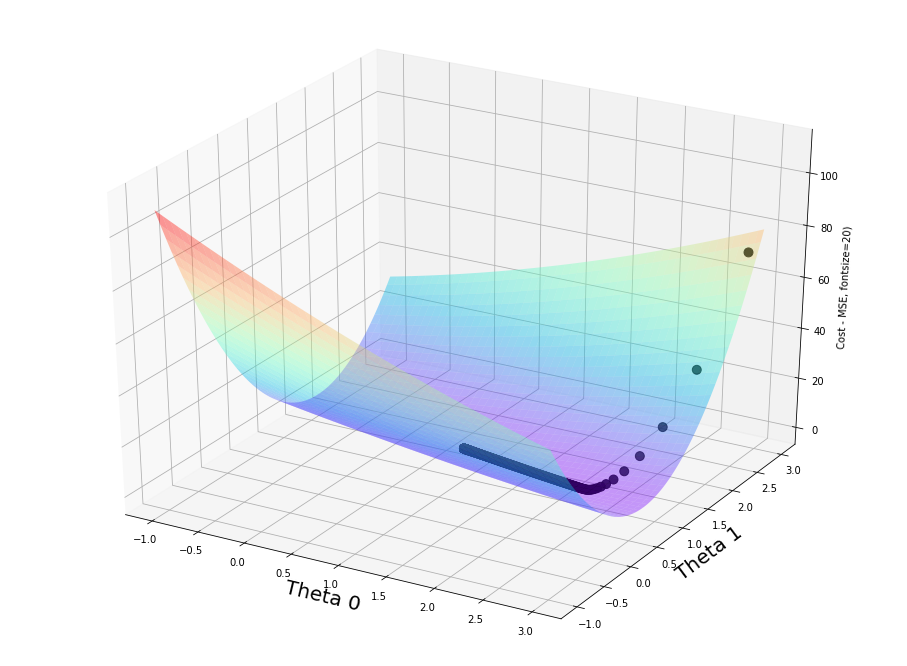

In [29]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE, fontsize=20)')

######################################################
# x values are in thetas[0]
# y values are in thetas[1]
# z values are in mse_valus
######################################################
# [:, 0] = all rows, 1st col
# [:, 1] = all rows, 2nd col
######################################################
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

nbr_thetas = 200
theta_0 = np.linspace(start=-1, stop=3, num=nbr_thetas)
theta_1 = np.linspace(start=-1, stop=3, num=nbr_thetas)
plot_t0, plot_t1 = np.meshgrid(theta_0, theta_1)
plot_cost = np.zeros( (nbr_thetas, nbr_thetas) )
for i in range(nbr_thetas):
    for j in range(nbr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)        

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()